In [3]:
#install.packages("factoextra")
#install.packages("clusterCrit")
library(factoextra) 
library(clusterCrit)

In [22]:
sales <- read.csv("VGSales.csv")
sales$Name <- NULL
sales$Publisher<- NULL
sales$Platform<- NULL
sales$Year<- NULL
sales$Genre<- NULL
sales <- sales[1:1000,]
sales

Rank,NA_Sales,EU_Sales,JP_Sales,Other_Sales,Global_Sales
1,41.49,29.02,3.77,8.46,82.74
2,29.08,3.58,6.81,0.77,40.24
3,15.85,12.88,3.79,3.31,35.82
4,15.75,11.01,3.28,2.96,33.00
5,11.27,8.89,10.22,1.00,31.37
6,23.20,2.26,4.22,0.58,30.26
7,11.38,9.23,6.50,2.90,30.01
8,14.03,9.20,2.93,2.85,29.02
9,14.59,7.06,4.70,2.26,28.62
10,26.93,0.63,0.28,0.47,28.31


In [23]:
df <- scale(sales)

In [24]:
data <- as.matrix(sales)

range_k = 2:10
dunn_kmeans <- c()
set.seed(123)

for (k in range_k) {
  set.seed(123)
  
  kmeans <- stats::kmeans(x = data, centers = k, nstart = 25)
  
  index_internal_kmeans <- clusterCrit::intCriteria(traj = data,
                                                    part = as.integer(kmeans$cluster), 
                                                    crit = "dunn")
  dunn_kmeans[k-1] <- index_internal_kmeans$dunn
}

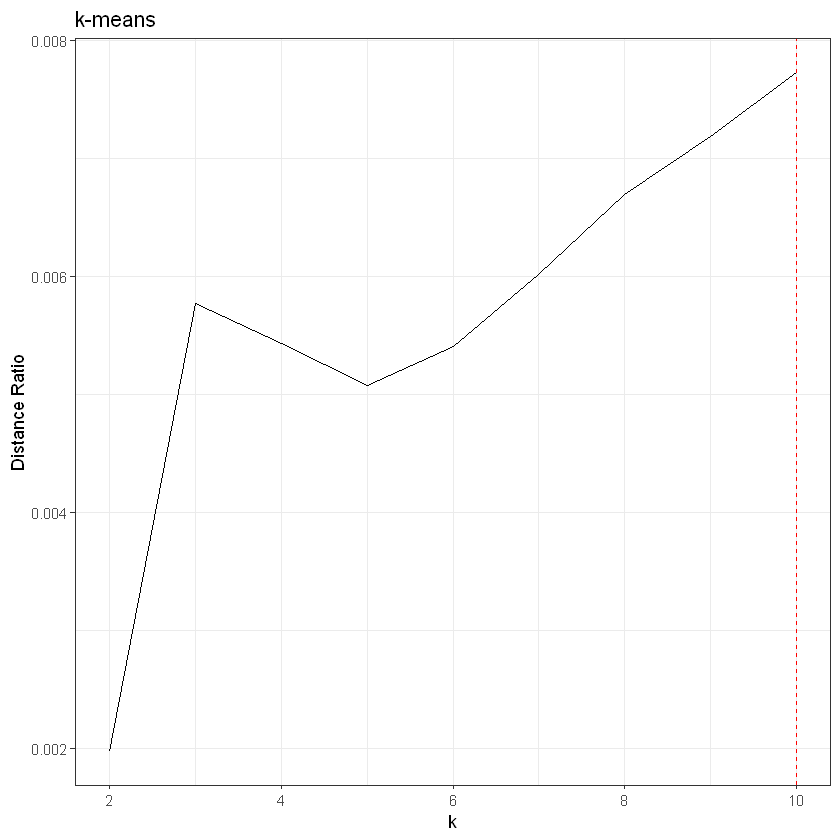

In [25]:
plot_dunn_kmeans <- ggplot2::qplot(x = range_k, 
                                   y = dunn_kmeans, 
                                   geom = 'line', 
                                   main = 'k-means', 
                                   xlab = 'k', 
                                   ylab = 'Distance Ratio')

plot_dunn_kmeans <- plot_dunn_kmeans  + 
  theme_bw() + #ylim(0,0.3) + 
  geom_vline(xintercept = range_k[which.max(dunn_kmeans)],
             linetype = 2, color='red')   
#ggsave(filename = "../../images/enh/dunn_kmeans_2_15.png", dpi = 300)

plot_dunn_kmeans

In [27]:
kmeans <- stats::kmeans(x = data, 
                        centers = range_k[which.max(dunn_kmeans)], 
                        nstart = 25)

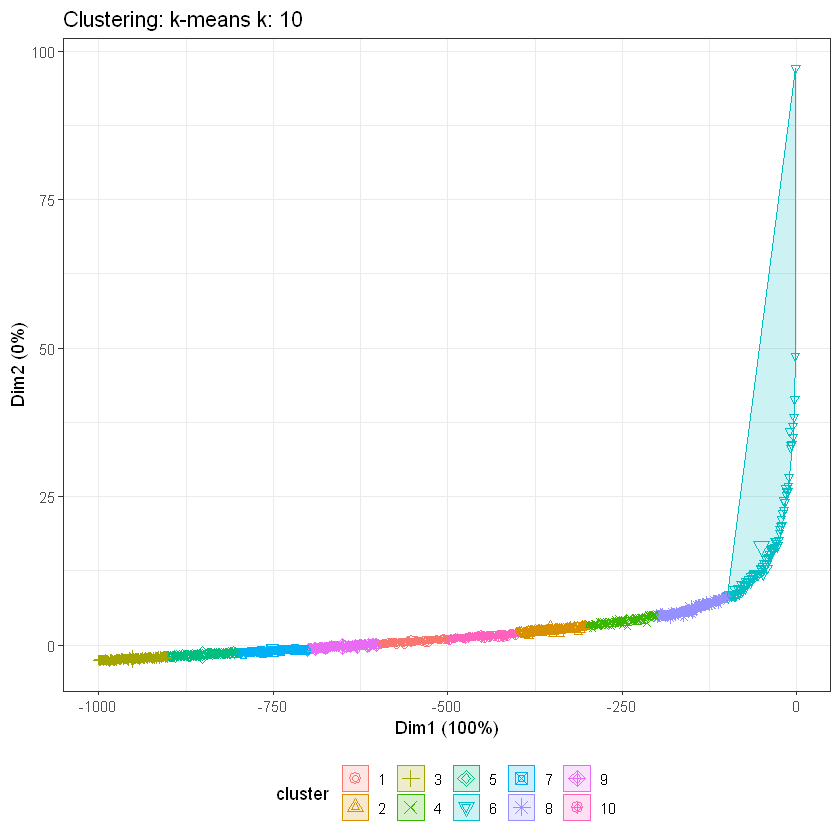

In [28]:
plot_kmeans <- factoextra::fviz_cluster(object = kmeans,
                                        data = data,
                                        stand = F, 
                                        geom =  'point', 
                                        ellipse.type = 'convex',
                                        ellipse = T,
                                        main = paste('Clustering: k-means k:', range_k[which.max(dunn_kmeans)]),
                                        outlier.color = 'black',
                                        show.clust.cent = T)

plot_kmeans <- plot_kmeans + 
  theme_bw() +
  theme(legend.position = 'bottom')  

plot_kmeans